In [6]:
import my_backtester as test
import pandas as pd


In [7]:
tc = 0.00007
df = pd.read_csv('data_small.csv', parse_dates = {'Datetime': ['Date', 'Time']}, index_col = 'Datetime')

In [12]:
test = test.MeanRevBacktetser2('DAX', 30, 2, '2010-03-01', '2021-10-12', tc, df)

TypeError: __init__() takes 7 positional arguments but 8 were given

In [ ]:
test.test_strategy()

(0.925305, -0.353793)

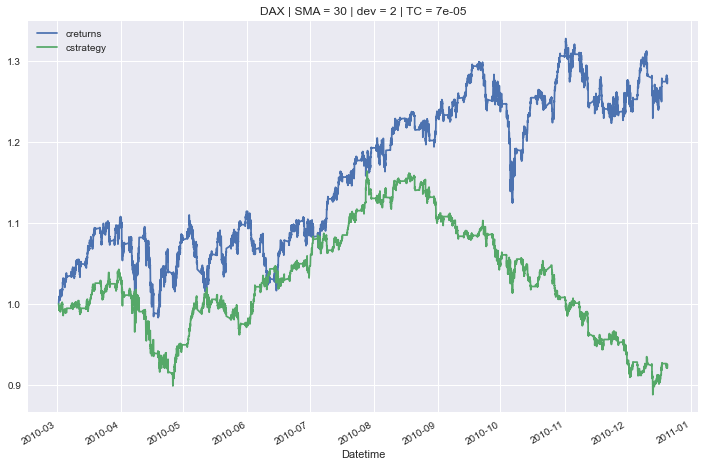

In [ ]:
test.plot_results()

In [ ]:
test.optimize_parameters((10,30), (2,5))

((29, 4), 1.170345)

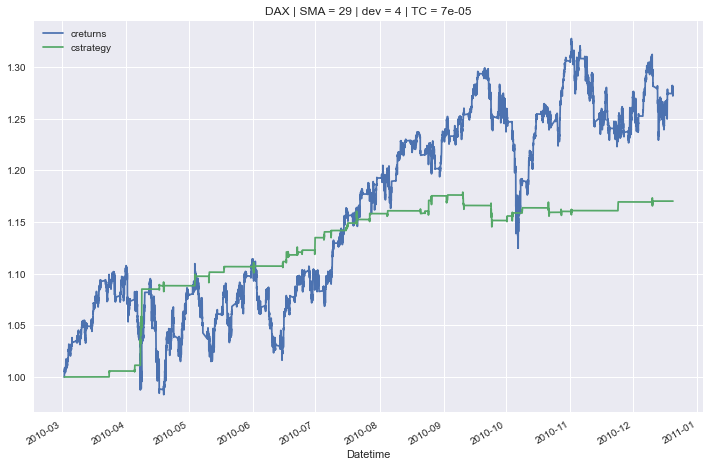

In [ ]:
test.plot_results()

In [1]:
import pandas as pd

tc = 0.00007
df = pd.read_csv('data_small.csv', parse_dates = {'Datetime': ['Date', 'Time']}, index_col = 'Datetime')

In [2]:
import talib as ta

In [2]:
tester = M.MLBacktester('AUDJPY', '2010-01-03', '2011-08-10', tc, df, 0.8)
tester

MLBacktester(symbol = AUDJPY, start = 2010-01-03, end = 2011-08-10, tc = 7e-05, train_ratio = 0.8)

In [3]:
tester.test_strategy()

(1.0532, 0.0271)

In [16]:
import ML as M
import pandas as pd

In [18]:
test = M.MLBacktester('AUDJPY', '2010-01-03', '2011-08-10', tc, df, 0.8)
test

MLBacktester(symbol = AUDJPY, start = 2010-01-03, end = 2011-08-10, tc = 7e-05)

In [19]:
test.test_strategy()

(1.053241, 0.027091)

In [21]:
test.prepare_features('2010-01-03', '2011-08-10')

In [7]:
df

,pice,returns,dir
Datetime,,,
2010-03-01 17:00:00,80.344,NaN,0
2010-03-01 17:15:00,80.342,-0.000025,0
2010-03-01 17:30:00,80.390,0.000597,1
2010-03-01 17:45:00,80.309,-0.001008,0
2010-03-01 18:00:00,80.273,-0.000448,0
...,...,...,...
2010-12-20 10:00:00,82.924,0.000398,1
2010-12-20 10:15:00,82.920,-0.000048,0
2010-12-20 10:30:00,82.957,0.000446,1


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_small.csv', parse_dates = {'Datetime': ['Date', 'Time']}, index_col = 'Datetime')


symbol = 'AUDJPY'


df = df[symbol].to_frame().dropna()
df.rename(columns={symbol: "price"}, inplace =True)
df['returns'] = np.log(df/df.shift(1))
df


,price,returns
Datetime,,
2010-03-01 17:00:00,80.344,NaN
2010-03-01 17:15:00,80.342,-0.000025
2010-03-01 17:30:00,80.390,0.000597
2010-03-01 17:45:00,80.309,-0.001008
2010-03-01 18:00:00,80.273,-0.000448
...,...,...
2010-12-20 10:00:00,82.924,0.000398
2010-12-20 10:15:00,82.920,-0.000048
2010-12-20 10:30:00,82.957,0.000446


In [2]:
window =50

df["dir"] = np.where(df["returns"] > 0, 1, 0)
df["sma"] = df["price"].rolling(window).mean() - df["price"].rolling(150).mean()
df["boll"] = (df["price"] - df["price"].rolling(window).mean()) / df["price"].rolling(50).std()
df["min"] = df["price"].rolling(window).min() / df["price"] - 1
df["max"] = df["price"].rolling(window).max() / df["price"] - 1
df["mom"] = df["returns"].rolling(3).mean()
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)



In [3]:
df

,price,returns,dir,sma,boll,min,max,mom,vol
Datetime,,,,,,,,,
2010-03-03 06:15:00,80.356,0.000336,1,-0.047540,1.531555,-0.003933,0.001008,-0.000012,0.000743
2010-03-03 06:30:00,80.380,0.000299,1,-0.048860,1.848077,-0.004230,0.000709,-0.000236,0.000730
2010-03-03 06:45:00,80.321,-0.000734,0,-0.050220,1.247383,-0.003498,0.001444,-0.000033,0.000734
2010-03-03 07:00:00,80.411,0.001120,1,-0.050020,2.247176,-0.004614,0.000323,0.000228,0.000752
2010-03-03 07:15:00,80.309,-0.001269,0,-0.049200,1.079800,-0.003350,0.001594,-0.000295,0.000740
...,...,...,...,...,...,...,...,...,...
2010-12-20 10:00:00,82.924,0.000398,1,-0.055313,-0.010417,-0.002267,0.001978,-0.000378,0.000700
2010-12-20 10:15:00,82.920,-0.000048,0,-0.053487,-0.074850,-0.002219,0.002026,-0.000157,0.000699
2010-12-20 10:30:00,82.957,0.000446,1,-0.053300,0.400478,-0.002664,0.001579,0.000265,0.000682


In [12]:
window = 50
lags = 5
cols = []
features_col = ["dir", "sma","boll", "min", "max", "mom", "vol"]

for f in features_col:
    for lag in range(1, lags + 1):
            col = "{}_lag_{}".format(f, lag)
            df[col] = df[f].shift(lag)
            cols.append(col)
df.dropna(inplace = True)

ValueError: Wrong number of items passed 44, placement implies 1

In [11]:
df

,price,returns,dir,sma,boll,min,max,mom,vol,dirlag1,...,bolllag4,bolllag5,minlag4,minlag5,maxlag4,maxlag5,momlag4,momlag5,vollag4,vollag5
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-03-03 09:15:00,80.147,0.001536,1,-0.042080,-0.754456,-0.001535,0.003618,0.000212,0.000760,0.0,...,-0.367144,1.238938,-0.001821,-0.003660,0.003130,0.001282,-0.000519,0.000104,0.000764,0.000733
2010-03-03 09:30:00,80.087,-0.000749,0,-0.042387,-1.358598,-0.000787,0.004370,0.000071,0.000766,1.0,...,-1.303354,-0.367144,-0.000699,-0.001821,0.004257,0.003130,-0.000960,-0.000519,0.000773,0.000764
2010-03-03 09:45:00,80.082,-0.000062,0,-0.044413,-1.352735,-0.000724,0.004433,0.000242,0.000750,0.0,...,-1.605551,-1.303354,0.000000,-0.000699,0.004583,0.004257,-0.001097,-0.000960,0.000733,0.000773
2010-03-03 10:00:00,79.992,-0.001124,0,-0.048227,-2.120747,0.000000,0.005563,-0.000645,0.000766,0.0,...,-2.051275,-1.605551,0.000000,0.000000,0.005161,0.004583,-0.000674,-0.001097,0.000735,0.000733
2010-03-03 10:15:00,79.981,-0.000138,0,-0.052453,-2.079500,0.000000,0.005701,-0.000441,0.000763,0.0,...,-0.754456,-2.051275,-0.001535,0.000000,0.003618,0.005161,0.000212,-0.000674,0.000760,0.000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-20 10:00:00,82.924,0.000398,1,-0.055313,-0.010417,-0.002267,0.001978,-0.000378,0.000700,0.0,...,1.307424,0.734884,-0.003505,-0.002928,0.000735,0.001314,0.000217,-0.000072,0.000721,0.000724
2010-12-20 10:15:00,82.920,-0.000048,0,-0.053487,-0.074850,-0.002219,0.002026,-0.000157,0.000699,1.0,...,1.154309,1.307424,-0.003397,-0.003505,0.000843,0.000735,0.000301,0.000217,0.000721,0.000721
2010-12-20 10:30:00,82.957,0.000446,1,-0.053300,0.400478,-0.002664,0.001579,0.000265,0.000682,0.0,...,0.423129,1.154309,-0.002688,-0.003397,0.001555,0.000843,-0.000080,0.000301,0.000723,0.000721


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

In [25]:
model.fit(df[cols], np.sign(df["returns"]))

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [28]:
df[cols]

,dirlag1,dirlag2,smalag1,smalag2,bolllag1,bolllag2,minlag1,minlag2,maxlag1,maxlag2,momlag1,momlag2,vollag1,vollag2
Datetime,,,,,,,,,,,,,,
2010-03-04 21:30:00,1.0,0.0,0.008940,-0.004367,0.824059,0.711857,-0.007566,-0.007420,0.003316,0.003779,-0.000096,-0.000125,0.001237,0.001236
2010-03-04 21:45:00,1.0,1.0,0.021993,0.008940,0.862643,0.824059,-0.007789,-0.007566,0.003091,0.003316,-0.000158,-0.000096,0.001237,0.001237
2010-03-04 22:00:00,0.0,1.0,0.032900,0.021993,0.526939,0.862643,-0.006860,-0.007789,0.004029,0.003091,-0.000083,-0.000158,0.001246,0.001237
2010-03-04 22:15:00,0.0,0.0,0.040527,0.032900,-0.004963,0.526939,-0.005372,-0.006860,0.005534,0.004029,-0.000736,-0.000083,0.001265,0.001246
2010-03-04 22:30:00,1.0,0.0,0.050167,0.040527,0.252310,-0.004963,-0.005629,-0.005372,0.004681,0.005534,-0.000528,-0.000736,0.001262,0.001265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-20 10:00:00,0.0,0.0,-0.057407,-0.056713,-0.408919,0.423129,-0.001870,-0.002688,0.002377,0.001555,-0.000546,-0.000080,0.000732,0.000723
2010-12-20 10:15:00,1.0,0.0,-0.055313,-0.057407,-0.010417,-0.408919,-0.002267,-0.001870,0.001978,0.002377,-0.000378,-0.000546,0.000700,0.000732
2010-12-20 10:30:00,0.0,1.0,-0.053487,-0.055313,-0.074850,-0.010417,-0.002219,-0.002267,0.002026,0.001978,-0.000157,-0.000378,0.000699,0.000700


In [27]:
predict = model.predict(df[cols])
predict

array([-1., -1.,  1., ...,  1., -1., -1.])

In [16]:
import talib as ta

import pandas as pd
import numpy as np
df = pd.read_csv('data_small.csv', parse_dates = {'Datetime': ['Date', 'Time']}, index_col = 'Datetime')
df

,AUDJPY,AUDUSD,EURCHF,EURGBP,EURJPY,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCHF,USDJPY,SILVER,GOLD,NAS,DAX,CAC,FTSE,DOW
Datetime,,,,,,,,,,,,,,,,,,
2010-03-01 17:00:00,80.344,0.89981,1.46319,0.90176,120.735,1.35220,1.49923,0.69922,1.04190,1.08209,89.287,16.560,1096.89001,1844,5711,3765,5402,10405
2010-03-01 17:15:00,80.342,0.90002,1.46324,0.90188,120.703,1.35216,1.49893,0.69918,1.04240,1.08211,89.267,16.530,1099.34998,1844,5710,3762,5399,10399
2010-03-01 17:30:00,80.390,0.90067,1.46330,0.90179,120.720,1.35266,1.49971,0.69969,1.04209,1.08184,89.247,16.550,1098.80005,1844,5711,3763,5400,10399
2010-03-01 17:45:00,80.309,0.90051,1.46330,0.90179,120.715,1.35365,1.50084,0.69957,1.04210,1.08099,89.177,16.520,1097.55005,1843,5708,3760,5400,10389
2010-03-01 18:00:00,80.273,0.90025,1.46343,0.90245,120.755,1.35426,1.50038,0.69954,1.04195,1.08059,89.165,16.500,1095.55005,1843,5711,3762,5402,10393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-20 10:00:00,82.924,0.98973,1.27153,0.84633,110.290,1.31664,1.55402,0.74264,1.01335,0.96596,83.787,30.705,1348.20000,2303,7285,3808,5241,11577
2010-12-20 10:15:00,82.920,0.98958,1.27196,0.84680,110.324,1.31536,1.55729,0.74134,1.01274,0.96537,83.783,30.680,1348.45000,2303,7305,3798,5252,11576
2010-12-20 10:30:00,82.957,0.98963,1.27125,0.84567,110.251,1.31576,1.55541,0.74172,1.01363,0.96644,83.785,30.685,1349.15000,2302,7312,3801,5261,11581


In [29]:
df = df['AUDJPY'].to_frame().dropna()


In [30]:
df['RSI'] = ta.RSI(df['AUDJPY'], timeperiod = 14)


In [33]:
df.dropna(inplace = True)
df

,AUDJPY,RSI
Datetime,,
2010-03-01 20:30:00,80.164,32.758621
2010-03-01 20:45:00,80.214,39.046220
2010-03-01 21:00:00,80.271,45.323071
2010-03-01 21:15:00,80.251,43.625525
2010-03-01 21:30:00,80.270,45.706000
...,...,...
2010-12-20 10:00:00,82.924,49.318064
2010-12-20 10:15:00,82.920,48.984685
2010-12-20 10:30:00,82.957,52.203208


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_small.csv', parse_dates = {'Datetime': ['Date', 'Time']}, index_col = 'Datetime')
data = df

In [3]:
symbol = 'NZDUSD'
raw =data  
raw = raw[symbol].to_frame().dropna()

raw.rename(columns=symbol: "price"}, inplace = True)
raw["returns"] = np.log(raw / raw.shift(1))
data = raw

SyntaxError: invalid syntax (Temp/ipykernel_22416/3110678912.py, line 5)

In [16]:
import Models as M
tc = 0.00007

C:\Users\Wojtek\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


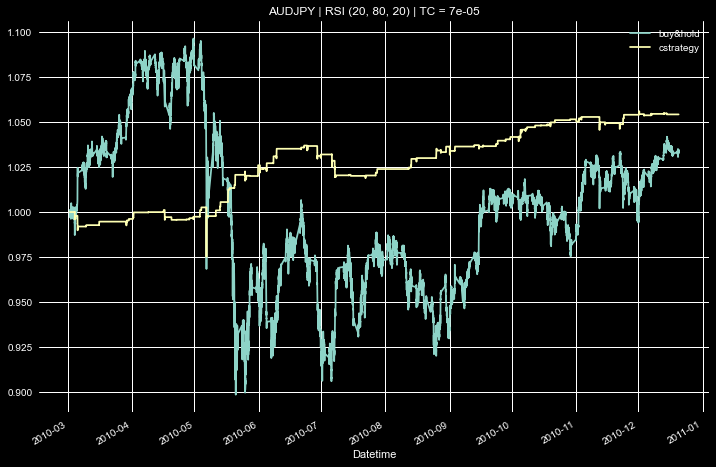

In [17]:
test = M.RSIBacktester('AUDJPY', 20, 80,20,'2010-01-03', '2011-08-10', tc, df)

In [18]:
test.optimize_parameters((5,20,1),(70,80,1),(20,30,1))

(array([10., 71., 20.]), 1.2303)

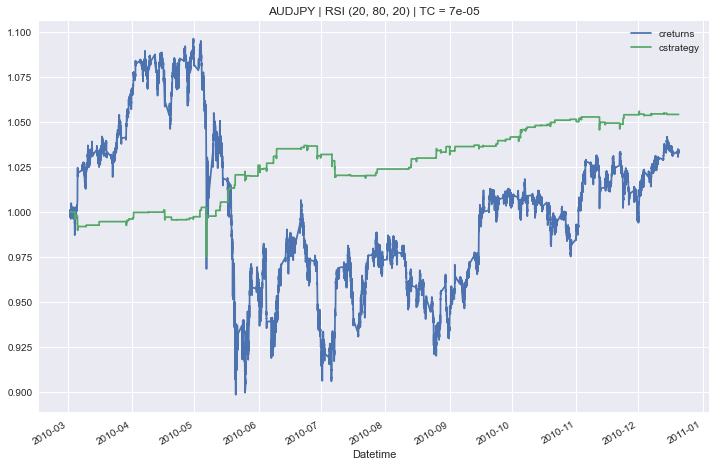

In [8]:
import RSIBacktester as R
tc = 0.00007

test2 = R.RSIBacktester('AUDJPY',20, 80,20,'2010-01-03', '2011-08-10', tc,df)

In [9]:
test2.test_strategy()

(1.054317, 0.020433)

In [2]:
test2.optimize_parameters((5,20,1),(70,80,1),(20,30,1))

NameError: name 'test2' is not defined

In [46]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_small.csv', parse_dates = {'Datetime': ['Date', 'Time']}, index_col = 'Datetime')


symbol = 'AUDJPY'


df = df[symbol].to_frame().dropna()
df.rename(columns={symbol: "price"}, inplace =True)
df['returns'] = np.log(df/df.shift(1))
df


,price,returns
Datetime,,
2010-03-01 17:00:00,80.344,NaN
2010-03-01 17:15:00,80.342,-0.000025
2010-03-01 17:30:00,80.390,0.000597
2010-03-01 17:45:00,80.309,-0.001008
2010-03-01 18:00:00,80.273,-0.000448
...,...,...
2010-12-20 10:00:00,82.924,0.000398
2010-12-20 10:15:00,82.920,-0.000048
2010-12-20 10:30:00,82.957,0.000446


In [1]:
SMA= 20
dev =2

df['SMA'] = df['price'].rolling(SMA).mean()
df['Lower'] = df['SMA'] - df['price'].rolling(SMA).std() * dev
df['Upper'] = df['SMA'] + df['price'].rolling(SMA).std() * dev

df["position"] = np.where(df.price < df.Lower, 1, np.nan)   #oversold - LONG!
df['position'] = np.where(df.price > df.Upper, -1, df.position)   #overbought - SHORT!
#df['position'] = np.where(df.distance * df.distance.shift(1) < 0, 0, df.position) #price crossing SMA - stay neutral
df['position'] = df.position.ffill().fillna(0)  #if none of above

df['strategy'] = df.position.shift(1) * df["returns"]
df['buy&hold'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)


td_year = df.strategy.count() / ((df.strategy.index[-1] - df.strategy.index[0]).days / 365)



df["strategy_cummax"] = df["cstrategy"].cummax()
df["buyhold_cummax"] = df['buy&hold'].cummax()
df1 
= df.strategy.mean() / df.strategy.std() * np.sqrt(td_year)
df2 = df.returns.mean() / df.returns.std() * np.sqrt(td_year)
dd = df["cstrategy"] - df['strategy_cummax'] / df['strategy_cummax']
dd2 = df['buy&hold'] - df['buyhold_cummax'] / df['buyhold_cummax']

SyntaxError: invalid syntax (Temp/ipykernel_13800/549040141.py, line 25)

In [17]:
from empyrical import max_drawdown

max_drawdown(df["cstrategy"])


ModuleNotFoundError: No module named 'empyrical'

In [25]:
import ffn


ModuleNotFoundError: No module named 'ffn'